<a href="https://colab.research.google.com/github/konaanitha/CodelabsIT496/blob/main/Anithak_DupontAnalysis_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

myAPIKey = '79fc3166e685d1fce583c5a0a5c9b71b'

stock = 'ZM'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()

incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

In [3]:
print(balanceStatements[:5])

[{'date': '2022-01-31', 'symbol': 'ZM', 'reportedCurrency': 'USD', 'cik': '0001585521', 'fillingDate': '2022-03-07', 'acceptedDate': '2022-03-07 16:02:53', 'calendarYear': '2022', 'period': 'FY', 'cashAndCashEquivalents': 1062820000, 'shortTermInvestments': 4356446000, 'cashAndShortTermInvestments': 5419266000, 'netReceivables': 419673000, 'inventory': 0.0, 'otherCurrentAssets': 344868000, 'totalCurrentAssets': 6183807000, 'propertyPlantEquipmentNet': 318319000, 'goodwill': 27607000, 'intangibleAssets': 0.0, 'goodwillAndIntangibleAssets': 27607000, 'longTermInvestments': 367814000, 'taxAssets': 382296000, 'otherNonCurrentAssets': 271475000, 'totalNonCurrentAssets': 1367511000, 'otherAssets': 0.0, 'totalAssets': 7551318000, 'accountPayables': 7841000.0, 'shortTermDebt': 0.0, 'taxPayables': 0.0, 'deferredRevenue': 1141435000, 'otherCurrentLiabilities': 430415000, 'totalCurrentLiabilities': 1579691000, 'longTermDebt': 85018000, 'deferredRevenueNonCurrent': 38481000, 'deferredTaxLiabilitie

In [4]:
threeYearBalanceStatement = balanceStatements[:4]
threeYearIncomeStatement = incomeStatements[:4]


In [5]:
#first fraction
profitability = []
#second fraction
assetTurnOver = []
#Third fraction
capitalStructure = []
returnOnEquity = []
dates=[]

In [6]:
for i in range(0,4):
  dates.append(threeYearBalanceStatement[i]['date'])
  profitabilityValue = threeYearIncomeStatement[i]['netIncome']/threeYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)

  assetTurnOverValue = threeYearIncomeStatement[i]['revenue']/threeYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue = threeYearBalanceStatement[i]['totalAssets']/threeYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)

  returnOnEquityValue = profitabilityValue * assetTurnOverValue * capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [7]:
print(returnOnEquity)

[0.23799908581599571, 0.17414052699890983, 0.030343800475572072, 0.04532307030334903]


In [8]:
df = pd.DataFrame(columns = ['date','profitability','assetTurnOver','CapitalStructure','returnOnEquity'])
#df['year'] = pd. DatetimeIndex(df['date']). year.

df['profitability'] = profitability
df['assetTurnOver'] = assetTurnOver
df['CapitalStructure'] = capitalStructure

df['returnOnEquity'] = returnOnEquity
df['date'] = dates


print(df)

         date  profitability  assetTurnOver  CapitalStructure  returnOnEquity
0  2022-01-31       0.335533       0.542934          1.306452        0.237999
1  2021-01-31       0.253573       0.500448          1.372264        0.174141
2  2020-01-31       0.040640       0.482739          1.546682        0.030344
3  2019-01-31       0.022946       0.932176          2.118931        0.045323


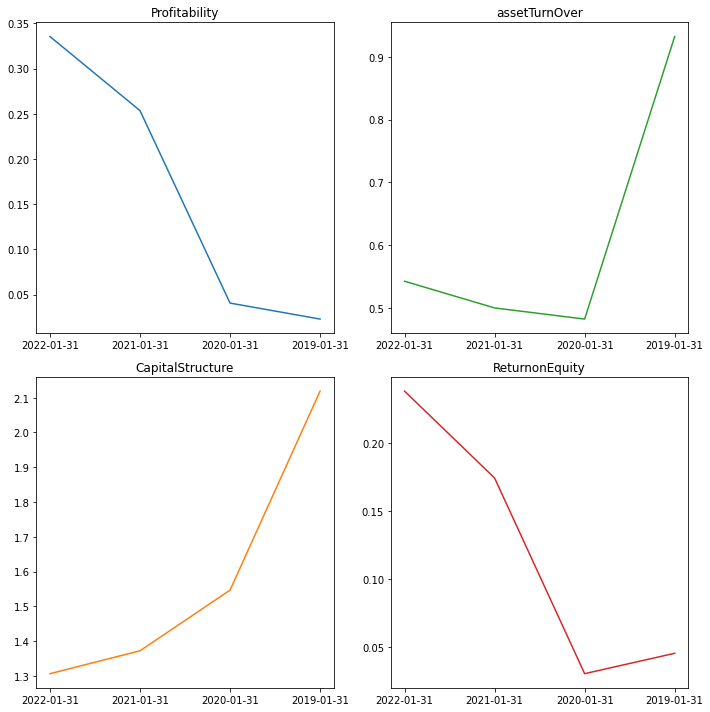

In [9]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
x = df['date']
axs[0, 0].plot(x, df['profitability'])
axs[0, 0].set_title('Profitability')
axs[0, 1].plot(x, df['assetTurnOver'],'tab:green')
axs[0, 1].set_title('assetTurnOver')
axs[1, 0].plot(x, df['CapitalStructure'],'tab:orange')
axs[1, 0].set_title('CapitalStructure')
axs[1, 1].plot(x, df['returnOnEquity'], 'tab:red')
axs[1, 1].set_title('ReturnonEquity')

fig.tight_layout()

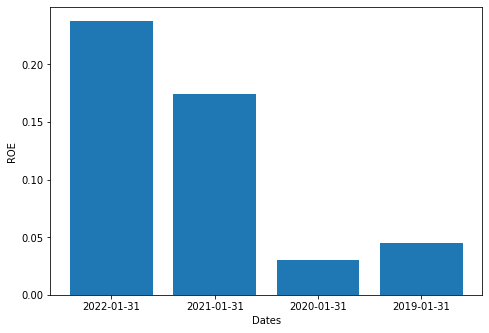

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df['date']
y = df['returnOnEquity']
ax.bar(x,y)
ax.set_xlabel('Dates')
ax.set_ylabel('ROE')
plt.show()